In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# change this to the code folder in your drive
home_dir = Path('/content/drive/MyDrive/266 Final Project/Code')
em_data_path =  home_dir / 'data' / 'emotional-reactions-reddit.csv'
ex_aug_data_path = home_dir / 'data' / 'explorations-reddit-aug.csv'
ex_data_path = home_dir / 'data' / 'explorations-reddit.csv'
in_data_path = home_dir / 'data' / 'interpretations-reddit.csv'

train_path = home_dir / 'data' / 'train'
val_path = home_dir / 'data' / 'val'
test_path = home_dir / 'data' / 'test'

In [ ]:
def load_and_score(data_path):
    df = pd.read_csv(data_path, delimiter=',')
    df['empathy'] = df.apply(lambda row: 0 if row['level'] == 0 else 1, axis=1)
    print('Unbalanced Data:')
    display(df.head(5))
    df[['level', 'empathy']].hist()
    plt.show()
    return df

def balance_data(df):
    frac = len(df[df['empathy']==1]) / len(df[df['empathy']==0])
    trim_df = pd.concat([df[df['empathy'] == 0].sample(frac=frac, random_state=42), df[df['empathy']==1]])
    print('\n\nBalanced Data')
    print('New Value Counts of Each Empathy Level')
    print(trim_df['empathy'].value_counts())
    trim_df[['level', 'empathy']].hist()
    plt.show()
    return trim_df

def get_first_rationale(rationales):
    if pd.isna(rationales):
        return np.nan
    else:
        return rationales.split('|')[0]

def get_longest_rationale(rationales):
    if pd.isna(rationales):
        return None
    else:
        rationale_list = rationales.split('|')
        return max(rationale_list, key=len)

def split_and_save(df, X_path, y_path):

    if 'augmented_flag' not in df.columns:
        df['augmented_flag'] = 0

    df['first_rationale'] = df['rationales'].apply(get_first_rationale)
    df['longest_rationale'] = df['rationales'].apply(get_longest_rationale)

    X = df[['seeker_post', 'response_post', 'augmented_flag', 'rationales', 'first_rationale', 'longest_rationale']]
    y = df[['empathy', 'augmented_flag', 'rationales', 'first_rationale', 'longest_rationale']]

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print('\n\nTrain/Val/Test Splits:')
    print(f'Length of X train {len(X_train)}')
    print(f'Length of X val {len(X_val)}')
    print(f'Length of X test {len(X_test)}')

    X_train.to_csv((train_path / X_path), index=False)
    X_val.to_csv((val_path / X_path), index=False)
    X_test.to_csv((test_path / X_path), index=False)

    y_train.to_csv((train_path / y_path), index=False)
    y_val.to_csv((val_path / y_path), index=False)
    y_test.to_csv((test_path / y_path), index=False)
    print('Saved X and y!')
    return y_train, y_val, y_test

Emotional Reactions
Unbalanced Data:


,sp_id,rp_id,seeker_post,response_post,level,rationales,empathy
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",0,NaN,0
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,0
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,0
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,0,NaN,0
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,0


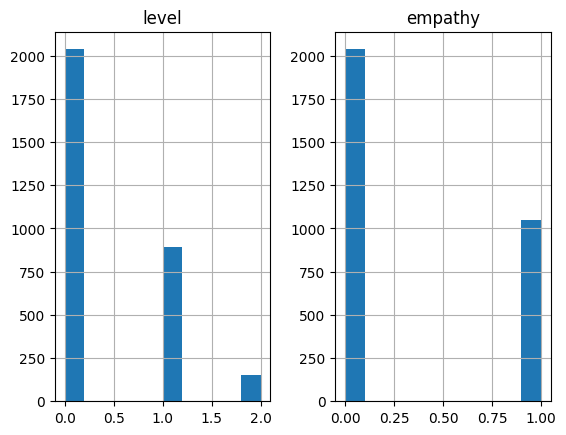



Balanced Data
New Value Counts of Each Empathy Level
0    1047
1    1047
Name: empathy, dtype: int64


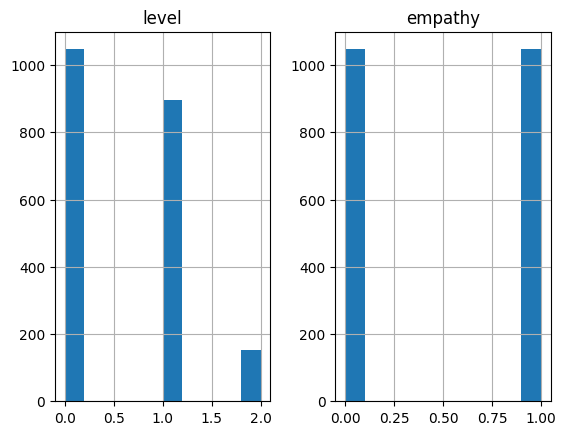



Train/Val/Test Splits:
Length of X train 1256
Length of X val 419
Length of X test 419
Saved X and y!


In [ ]:
print('Emotional Reactions')
em_df = load_and_score(em_data_path)
trim_em_df = balance_data(em_df)
y_train, y_val, y_test = split_and_save(trim_em_df, 'X_em.csv', 'y_em.csv')

Explorations
Unbalanced Data:


,sp_id,rp_id,seeker_post,response_post,level,rationales,empathy
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,1
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,0
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,0
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,1
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,0


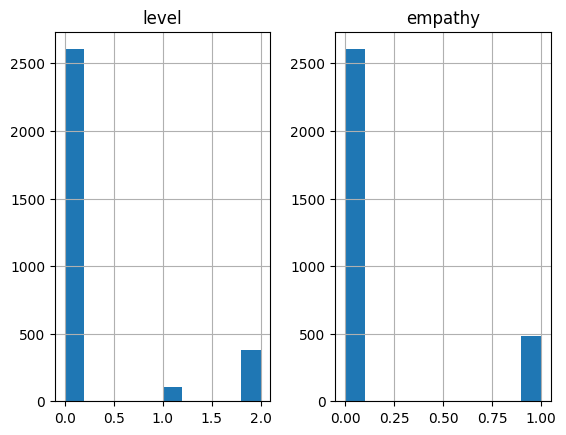



Balanced Data
New Value Counts of Each Empathy Level
0    480
1    480
Name: empathy, dtype: int64


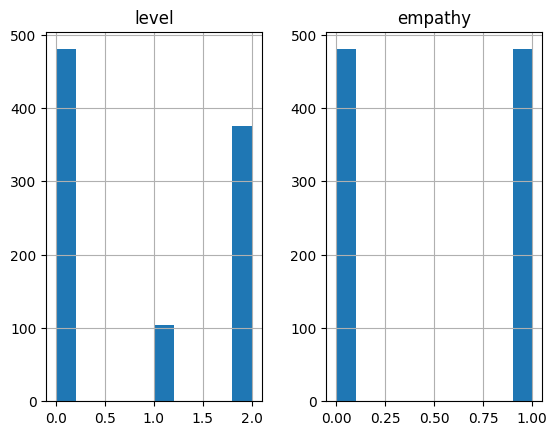



Train/Val/Test Splits:
Length of X train 576
Length of X val 192
Length of X test 192
Saved X and y!


In [ ]:
print('Explorations')
ex_df = load_and_score(ex_data_path)
trim_ex_df = balance_data(ex_df)
y_train, y_val, y_test = split_and_save(trim_ex_df, 'X_ex.csv', 'y_ex.csv')

Explorations Augmented
Unbalanced Data:


,sp_id,rp_id,seeker_post,response_og,level,rationales,response_trans,response_back_trans,augmented_flag,response_post,empathy
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a...",0,"That's pretty vague, do you not know what you'...",1
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,NaN,NaN,0,idk what a Red pill means exactly but my advic...,0
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,NaN,NaN,0,"I think it's social anxiety , that creates par...",0
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,Por casualidad crees que estás en un bucle. La...,By chance you think you are in a loop. Junk fo...,0,By any chance do you think you're in a loop. J...,1
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,NaN,NaN,0,depression. not sadness which is caused by som...,0


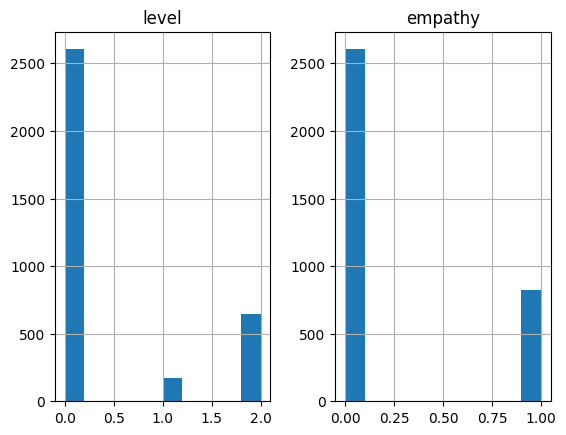



Balanced Data
New Value Counts of Each Empathy Level
0    820
1    820
Name: empathy, dtype: int64


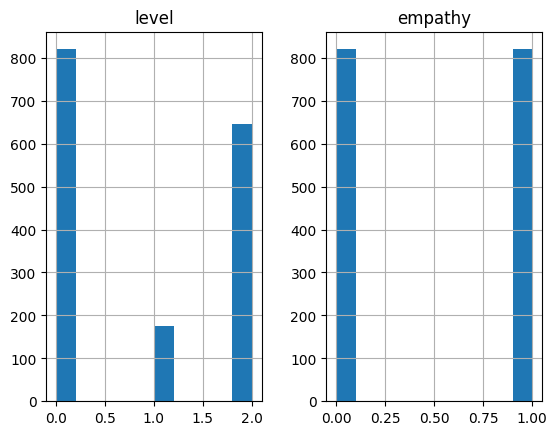



Train/Val/Test Splits:
Length of X train 984
Length of X val 328
Length of X test 328
Saved X and y!


In [ ]:
print('Explorations Augmented')
ex_aug_df = load_and_score(ex_aug_data_path)
trim_ex_aug_df = balance_data(ex_aug_df)
y_train, y_val, y_test = split_and_save(trim_ex_aug_df, 'X_ex_aug.csv', 'y_ex_aug.csv')

In [ ]:
y_train[['empathy', 'augmented_flag']].value_counts()

empathy  augmented_flag
0        0                 486
1        0                 295
         1                 203
dtype: int64

In [ ]:
y_val[['empathy', 'augmented_flag']].value_counts()

empathy  augmented_flag
0        0                 158
1        0                  97
         1                  73
dtype: int64

In [ ]:
y_test[['empathy', 'augmented_flag']].value_counts()

empathy  augmented_flag
0        0                 176
1        0                  88
         1                  64
dtype: int64

Interpretations
Unbalanced Data:


,sp_id,rp_id,seeker_post,response_post,level,rationales,empathy
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",0,NaN,0
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,0
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",2,unless I'm wrong but that's how I feel|,1
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,For a while that was my problem too. Even if i...,1
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,2,I take antidepressants and my depression is go...,1


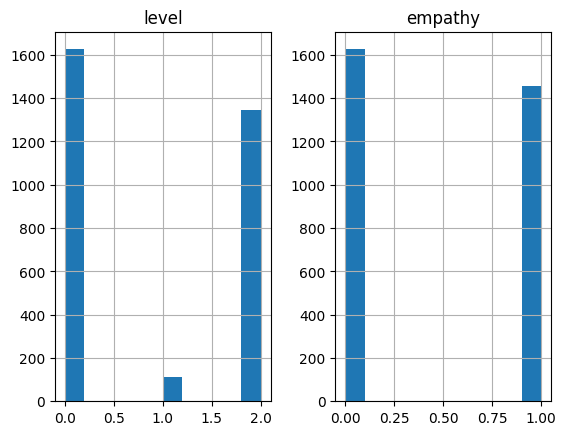



Balanced Data
New Value Counts of Each Empathy Level
0    1458
1    1458
Name: empathy, dtype: int64


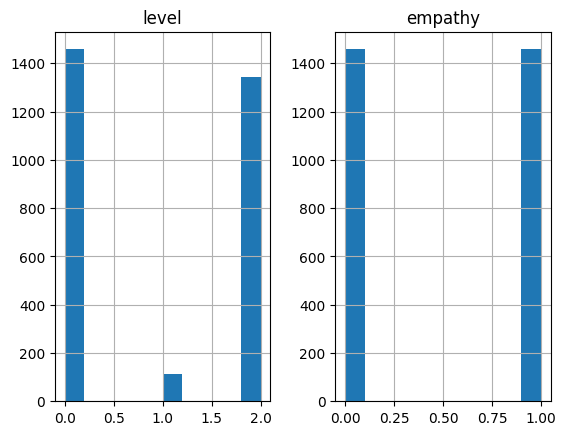



Train/Val/Test Splits:
Length of X train 1850
Length of X val 617
Length of X test 617
Saved X and y!


In [ ]:
print('Interpretations')
in_df = load_and_score(in_data_path)
trim__df = balance_data(in_df)
x_in = split_and_save(in_df, 'X_in.csv', 'y_in.csv')

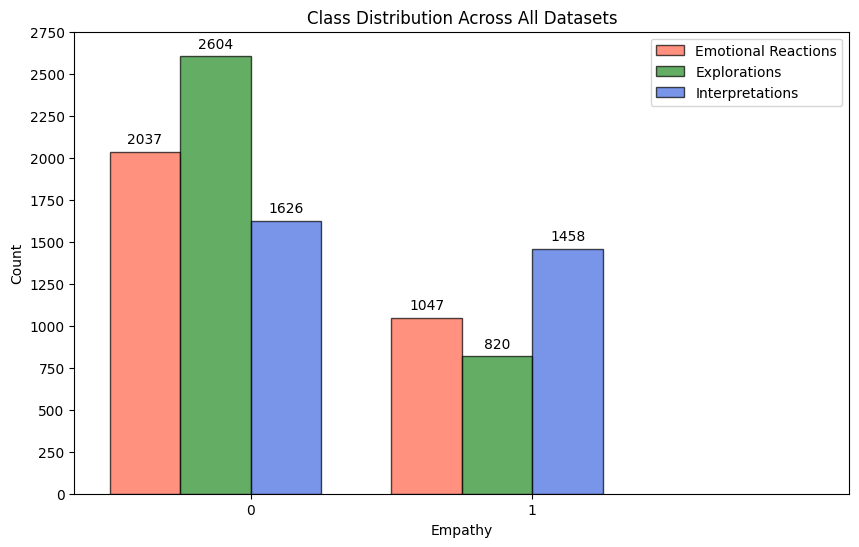

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

df1 = em_df['empathy']
df2 = ex_df['empathy']
df3 = in_df['empathy']
bar_width = 0.25
num_datasets = 3
# Plot histogram for each dataset
for i, (df, label, color) in enumerate(zip([df1, df2, df3], ['Emotional Reactions', 'Explorations', 'Interpretations'], ['tomato', 'forestgreen', 'royalblue'])):
    positions = np.arange(0, 3) + i * bar_width - (num_datasets - 1) * bar_width / 2
    plt.hist(df, bins=np.arange(-0.5, 2, 1)+i*bar_width, alpha=0.7, label=label, color=color, edgecolor='black', linewidth=1, width=bar_width)
    for pos, value in zip(positions, df.value_counts().sort_index()):
        plt.text(pos-bar_width/2, value + 30, str(value), ha='center', va='bottom', color='black')

# Customize plot
plt.xlabel('Empathy')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.yticks(np.arange(0, 2751, 250))
plt.legend()
# plt.grid(axis='y', alpha=0.7)
plt.title('Class Distribution Across All Datasets')

# Show plot
plt.show()

In [ ]:
in_df['first_rationale']=in_df['rationales'].str.split('|')[0]

In [ ]:
x_in

,sp_id,rp_id,seeker_post,response_post,level,rationales,empathy,augmented_flag,first_rationale
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",0,NaN,0,0,NaN
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,0,0,NaN
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",2,unless I'm wrong but that's how I feel|,1,0,unless I'm wrong but that's how I feel
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,For a while that was my problem too. Even if i...,1,0,For a while that was my problem too. Even if i...
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,2,I take antidepressants and my depression is go...,1,0,I take antidepressants and my depression is go...
...,...,...,...,...,...,...,...,...,...
3079,8jltcy,dz0kvhi,does anyone else keep forgetting stuff the nee...,"All day, every day. It's definitely not just y...",1,"All day, every day. It's definitely not just y...",1,0,"All day, every day. It's definitely not just y..."
3080,94xc3o,e3ok8c0,What does depression feel like?. Honest questi...,like being stuck in a black hole. At times you...,0,NaN,0,0,NaN
3081,3zbq8e,cykvlsj,I'm to scared to commit suicide.. All I can fe...,I probably would have considered bringing harm...,2,My life is not pleasant by any means so I crea...,1,0,My life is not pleasant by any means so I crea...
3082,5kpp98,dbpqi2p,I just want to disappear but I don't want to h...,People barely notice me too,2,People barely notice me too|,1,0,People barely notice me too


#GRAVEYARD
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
len(em_df[em_df['empathy'] == 0])

sp_id            2037
rp_id            2037
seeker_post      2037
response_post    2037
level            2037
rationales          0
empathy          2037
dtype: int64

In [ ]:
em_df = pd.read_csv(em_data_path, delimiter=',')
em_df['empathy'] = em_df.apply(lambda row: 0 if row['level'] == 0 else 1, axis=1)

array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'empathy'}>]], dtype=object)

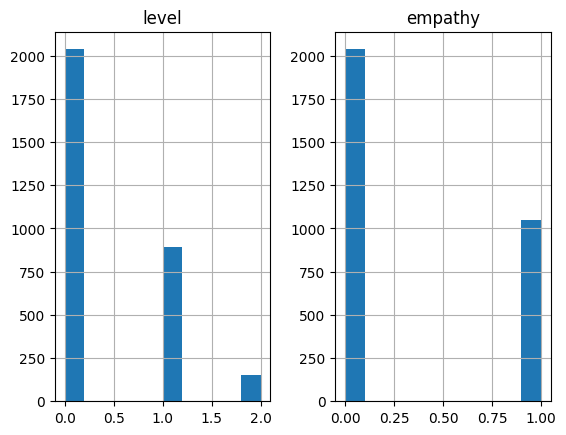

In [ ]:
em_df.hist()

In [ ]:
em_trim_df = pd.concat([em_df[em_df['empathy'] == 0].sample(frac=0.525, random_state=42), em_df[em_df['empathy']==1]])

array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'empathy'}>]], dtype=object)

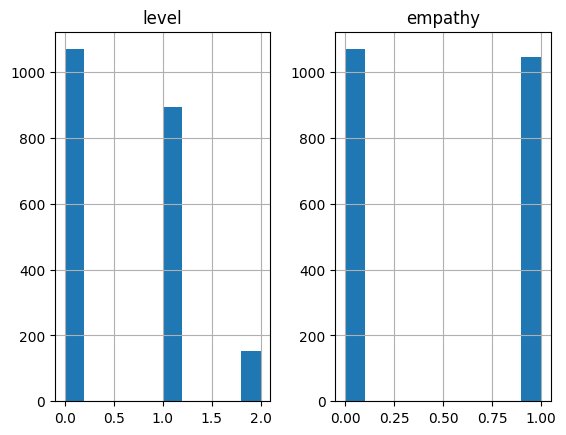

In [ ]:
em_trim_df.hist()

In [ ]:
X_em = em_trim_df[['seeker_post', 'response_post']]
y_em = em_trim_df['empathy']

X_em_train, X_em_temp, y_em_train, y_em_temp = train_test_split(X_em, y_em, test_size=0.4, random_state=42)
X_em_val, X_em_test, y_em_val, y_em_test = train_test_split(X_em_temp, y_em_temp, test_size=0.5, random_state=42)

In [ ]:
X_em_train

,seeker_post,response_post
2840,"I gonna beat you down, depression.. And you al...",missed you a lot! Are you doing well?
2051,I feel like everyone enjoying life is living a...,"I feel the same way, but I'm probably just pro..."
496,Writer with a quick question. Hi! I'm a journa...,There aren't that many threads here though. So...
1583,"Swear to god, what am i even doing. Idk why I ...",Depression can be cyclical. Our brain's chemis...
2950,Anyone else feel unlovable. All i want is hugs...,I kind of agree with you but doing all that re...
...,...,...
1845,Numb. I know how to find meaning in anything. ...,sorry to hear. :( is this an ongoing thing or ...
88,Feeling dead inside. For the last 1-2 weeks fe...,"As someone who's felt the same, what do you ha..."
234,Another great start to the week. Just found ou...,Well fair enough. I'm sorry there isn't anythi...
804,It’s my birthday. And I want to kill myself. A...,I'm sorry you're feeling so blue today. I want...


<Axes: >

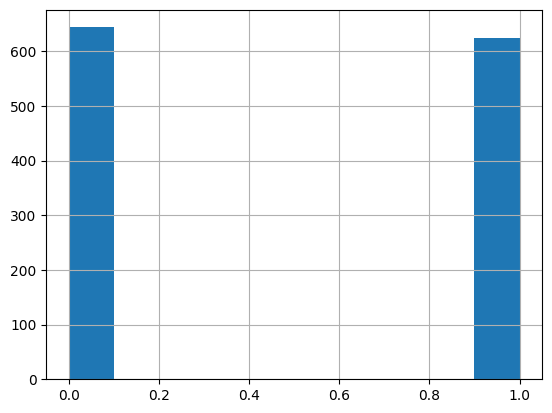

In [ ]:
y_em_train.hist()

In [ ]:
print(f'Length of X train {len(X_em_train)}')
print(f'Length of X val {len(X_em_val)}')
print(f'Length of X test {len(X_em_test)}')

Length of X train 1269
Length of X val 423
Length of X test 424


In [ ]:
train_path = home_dir / 'data' / 'train'
val_path = home_dir / 'data' / 'val'
test_path = home_dir / 'data' / 'test'

In [ ]:
X_em_train.to_csv((train_path / 'X_em.csv'))
X_em_val.to_csv((val_path / 'X_em.csv'))
X_em_train.to_csv((test_path / 'X_em.csv'))

y_em_train.to_csv((train_path / 'y_em.csv'))
y_em_val.to_csv((val_path / 'y_em.csv'))
y_em_train.to_csv((test_path / 'y_em.csv'))

In [ ]:
ex_df = pd.read_csv(ex_data_path, delimiter=',', index_col=False)
ex_df['empathy'] = ex_df.apply(lambda row: 0 if row['level'] == 0 else 1, axis=1)

array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'empathy'}>]], dtype=object)

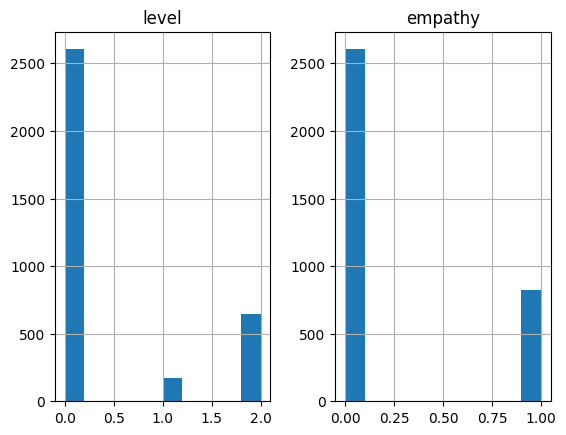

In [ ]:
ex_df[['level', 'empathy']].hist()

In [ ]:
def func():
    ex_df[['level', 'empathy']].hist()
    plt.show()
    display(ex_df.head())

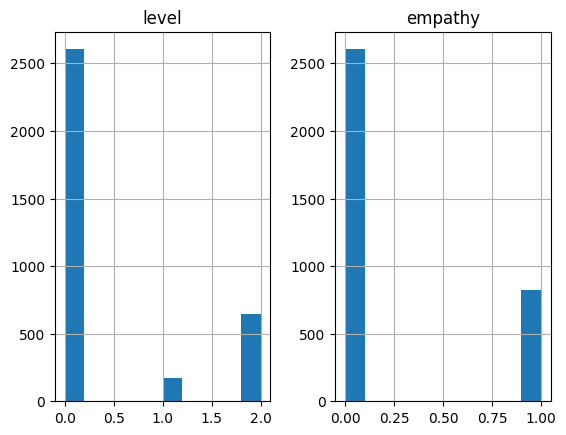

,Unnamed: 0,sp_id,rp_id,seeker_post,response_og,level,rationales,response_trans,response_back_trans,augmented_flag,response_post,empathy
0,0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a...",0,"That's pretty vague, do you not know what you'...",1
1,1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,NaN,NaN,0,idk what a Red pill means exactly but my advic...,0
2,2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,NaN,NaN,0,"I think it's social anxiety , that creates par...",0
3,3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,Por casualidad crees que estás en un bucle. La...,By chance you think you are in a loop. Junk fo...,0,By any chance do you think you're in a loop. J...,1
4,4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,NaN,NaN,0,depression. not sadness which is caused by som...,0


In [ ]:
func()

In [ ]:
ex_df

,Unnamed: 0,sp_id,rp_id,seeker_post,response_og,level,rationales,response_trans,response_back_trans,augmented_flag,response_post,empathy
0,0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a...",0,"That's pretty vague, do you not know what you'...",1
1,1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,NaN,NaN,0,idk what a Red pill means exactly but my advic...,0
2,2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,NaN,NaN,0,"I think it's social anxiety , that creates par...",0
3,3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,Por casualidad crees que estás en un bucle. La...,By chance you think you are in a loop. Junk fo...,0,By any chance do you think you're in a loop. J...,1
4,4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,NaN,NaN,0,depression. not sadness which is caused by som...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3419,78y25t,doxs89f,Self Harm Habit. My anxiety and depression has...,Is it the feeling or the visual that eases you?,2,Is it the feeling or the visual that eases you?|,¿Es el sentimiento o la visual que te facilita?,Is the feeling or visual that facilitates you?,1,Is the feeling or visual that facilitates you?,1
3420,3420,67p127,dgs3c5o,It's so depressing to know that I have an ADHD...,"Heya buddy, i can relate, After 18 years of st...",2,"My question to you is, how are you going to mo...","Heya Buddy, puedo relacionarme, después de 18 ...","Heya Buddy, I can relate, after 18 years of st...",1,"Heya Buddy, I can relate, after 18 years of st...",1
3421,3421,9pnz1i,e833daa,why am i depressed?. why am i depressed? &amp...,Does you happiness rely on other people's beha...,2,Does you happiness rely on other people's beha...,¿Tu felicidad confía en el comportamiento de o...,Does your happiness trust other people's behav...,1,Does your happiness trust other people's behav...,1
3422,3422,7if1m2,dqy7pzy,I feel like I’m an inconvenience or a nuisance...,I feel like there might just be an in-between ...,2,is this a neutral-positive perspective?|,Siento que también podría haber un intermediar...,I feel that there could also be an intermediar...,1,I feel that there could also be an intermediar...,1
